# Load dependencies

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("ms_annual_data_2022.csv")

/tmp/ipykernel_2967/889266919.py:1: DtypeWarning: Columns (7,13,14,18,20,26,27,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ms_annual_data_2022.csv")


# Preprocessing

## Step 1
We do notice that there is a lot of missing data, so the first thing we should do is either fill in that data or potentially remove it from our model.

In [4]:
missing_values_count = df.isnull().sum()
missing_values_count

matched_2021                  0
new_item_2022                 0
menu_item_id                  0
food_category                 0
restaurant                    1
item_name                     0
item_description              0
serving_size              13573
serving_size_text         26189
serving_size_unit         14024
serving_size_household    22031
calories                    451
total_fat                   702
saturated_fat               820
trans_fat                  2241
cholesterol                1035
sodium                      965
carbohydrates               964
dietary_fiber              1430
sugar                      1043
protein                    1016
potassium                 24451
notes                     26198
calories_text             26044
total_fat_text            26230
saturated_fat_text        26230
trans_fat_text            26232
cholesterol_text          26232
sodium_text               26230
carbohydrates_text        26230
dietary_fiber_text        26232
sugar_te

In [5]:
total_number_rows = df.shape[0]
total_number_rows

26238

Lets do the easy work first. One instance does not have an associated restaurant. The food items associated with no restaurant is not useful for our users. Let's remove that.

In [6]:
df_filtered = df.dropna(subset=['restaurant'])

Another easy feature to remove is the id. It is nothing more than an arbitrary number assigned to each product, and thus should not be included in our model.

In [7]:
df_filtered = df_filtered.drop(columns=['menu_item_id'])

The matched 2021 and new item in 2022 features aren't important for our model either. The user only cares about what is available now. Lets drop these features.

In [8]:
df_filtered = df_filtered.drop(columns=['matched_2021', 'new_item_2022'])

The majority of nutrition_text seems to be missing. Let's see what's going on.

In [9]:
df_with_calories_text = df_filtered.dropna(subset=['calories_text'])
df_with_calories_text

,food_category,restaurant,item_name,item_description,serving_size,serving_size_text,serving_size_unit,serving_size_household,calories,total_fat,...,calories_text,total_fat_text,saturated_fat_text,trans_fat_text,cholesterol_text,sodium_text,carbohydrates_text,dietary_fiber_text,sugar_text,protein_text
1998,Desserts,Bob Evans,"Double-Crust Apple Pie, Slice","Double-Crust Apple Pie, Slice, Includes: Caram...",NaN,NaN,NaN,Slice,600,28.0,...,2460-5160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2037,Beverages,Bob Evans,Apple Juice,"Apple Juice, Morning Wake-Up, Beverages",NaN,NaN,NaN,NaN,210,0.0,...,5400-6840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2058,Salads,Bob Evans,Cranberry Pecan Chicken Salad,"Includes: Fresh Greens, Grilled Chicken, Bacon...",NaN,NaN,NaN,NaN,920,59.0,...,600-2160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2073,Toppings & Ingredients,Bob Evans,Dried Cranberries,"Dried Cranberries, Available In Oatmeal, Farm ...",NaN,NaN,NaN,NaN,40,NaN,...,5460-9720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2082,Salads,Bob Evans,1/2 Wildfire Fried Chicken Salad (No Dressing),1/2 Wildfire Fried Chicken Salad (No Dressing)...,NaN,NaN,NaN,NaN,410,20.0,...,4080-6360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24996,Entrees,Wendy's,Kids' 4pc Nuggets,"Kids' 4pc Nuggets, Apple Bites, Milk, Choice o...",NaN,NaN,NaN,NaN,NaN,NaN,...,240-620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25091,Beverages,Wendy's,Coca- Cola Freestyle,"Coca- Cola Freestyle, Choice of: Dave's Cherry...",NaN,NaN,NaN,NaN,NaN,NaN,...,0-384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25092,Burgers,Wendy's,Kids' Hamburger,"Kids' Hamburger, Sandwich Bun, Jr. Hamburger P...",NaN,NaN,NaN,NaN,NaN,NaN,...,300-620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25094,Burgers,Wendy's,Kids' Cheeseburger,"Kids' Cheeseburger, Sandwich Bun, Jr. Hamburge...",NaN,NaN,NaN,NaN,NaN,NaN,...,320-640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There seems to be a range of what the actual calorie values can be, along with other nutrition values for select food items. Some of these ranges seem to be really large. Unfortunately, we don't have the data to estimate the average amount of calories for these items. Since we are working with incomplete information, the most conservative approach is to drop the instances without exact nutrient counts.

In [10]:
df_filtered = df_filtered.drop(columns=['calories_text', 'total_fat_text', 'saturated_fat_text', 'trans_fat_text',
                      'cholesterol_text', 'sodium_text', 'carbohydrates_text', 'dietary_fiber_text',
                      'sugar_text', 'protein_text'], axis = 1)

df_filtered = df_filtered.dropna(subset=['calories', 'total_fat', 'saturated_fat', 'trans_fat',
                      'cholesterol', 'sodium', 'carbohydrates', 'dietary_fiber',
                      'sugar', 'protein'], how='any')

We also see that most restaurants did not include any information about potassium. For a cleaner model, let's also remove that feature.

In [11]:
df_filtered = df_filtered.drop(columns=['potassium'])

Another feature of this dataset is the serving size, which half the data is missing. Unless restaurants serve food that is supposed to be for more than one person, this shouldn't matter too much either. Lets inspect what is going on.

In [12]:
df_with_serving_size_household = df_filtered.dropna(subset=['serving_size_household'])
df_with_serving_size_household

,food_category,restaurant,item_name,item_description,serving_size,serving_size_text,serving_size_unit,serving_size_household,calories,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbohydrates,dietary_fiber,sugar,protein,notes
533,Sandwiches,Auntie Anne's,Mini Pretzel Dogs,"Mini Pretzel Dogs, Pretzel Dogs",216.0,NaN,g,10 count,630,35.0,15,0,80,1290,56,2,8,20,NaN
534,Sandwiches,Auntie Anne's,Mini Pretzel Dogs no Butter,"Mini Pretzel Dogs no Butter, Pretzel Dogs",211.0,NaN,g,10 count,580,30.0,12,0,70,1290,56,2,8,20,NaN
551,Entrees,Auntie Anne's,Breakfast Sausage Stix,"Breakfast Sausage Stix, Breakfast Products",245.0,NaN,g,5 sticks,760,43.0,15,0,100,1240,65,2,9,27,NaN
552,Entrees,Auntie Anne's,Breakfast Sausage Stix no Buter,"Breakfast Sausage Stix no Buter, Breakfast Pro...",240.0,NaN,g,5 sticks,720,38.0,12,0,85,1240,65,2,9,27,NaN
611,Beverages,Auntie Anne's,Nestlé Hot Cocoa,"Nestlé Hot Cocoa, Beverages",20.0,NaN,g,1 packet,80,3.0,2,0,0,170,15,1,12,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26214,Beverages,Zaxby's,"Minute Maid Lemonade, Small","Minute Maid Lemonade, Small, Drinks",NaN,NaN,NaN,Small,260,0.0,0.0,0.0,0,115,68,0.0,67,0.0,NaN
26215,Beverages,Zaxby's,"Minute Maid Lemonade, Medium","Minute Maid Lemonade, Medium, Drinks",NaN,NaN,NaN,Medium,390,0.0,0.0,0.0,0,170,102,0.0,101,0.0,NaN
26216,Beverages,Zaxby's,"Minute Maid Lemonade, Large","Minute Maid Lemonade, Large, Drinks",NaN,NaN,NaN,Large,520,0.0,0.0,0.0,0,230,136,0.0,135,0.0,NaN
26217,Beverages,Zaxby's,"Minute Maid Lemonade, Kidz","Minute Maid Lemonade, Kidz, Drinks",NaN,NaN,NaN,Kids,160,0.0,0.0,0.0,0,70,41,0.0,40,0.0,NaN


These features don't tell us much either. Lets remove it.

In [13]:
df_filtered = df_filtered.drop(columns=['serving_size', 'serving_size_text', 'serving_size_unit', 'serving_size_household'])

Most instances do not use the notes feature. Lets see what is going on.

In [14]:
df_with_notes = df_filtered.dropna(subset=['notes'])
df_with_notes

,food_category,restaurant,item_name,item_description,calories,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbohydrates,dietary_fiber,sugar,protein,notes
14442,Baked Goods,Krispy Kreme,Reese's Peanut Butter Doughnut,Reese's Peanut Butter Doughnut,410,25.0,0,0,0,0,0,0,0,0,believe nutrition incorrect
21834,Beverages,Starbucks,"Caffe Vanilla Frappuccino Blended Beverage, Venti","Caffe Vanilla Frappuccino Blended Beverage, Ve...",510,16.0,10.0,0.5,50,310,85,0.0,83,6.0,Calculator for sugar likely broken
22021,Beverages,Starbucks,"Vanilla Sweet Cream Cold Brew, Trenta","Vanilla Sweet Cream Cold Brew, Trenta, 4 Pump ...",220,11.0,7.0,0.0,35,40,28,0.0,0,2.0,Calculator for sugar likely broken


The notes feature of all applicable instances tells us that the calculations for these instances may be inaccurate. Lets remove these instances.

In [15]:
df_filtered = df_filtered[df_filtered['notes'].isna()]
df_filtered = df_filtered.drop(columns=['notes'])

Now lets assess how much data we have left.

In [16]:
total_number_rows_filtered = df_filtered.shape[0]
total_number_rows_filtered

22440

In [17]:
percent_data_removed = (total_number_rows - total_number_rows_filtered) / total_number_rows
percent_data_removed

0.14475188657672078

We do have to keep in mind that the preprocessing step removed a portion of data, but we should still have enough data to work with.

In [18]:
df_filtered

,food_category,restaurant,item_name,item_description,calories,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbohydrates,dietary_fiber,sugar,protein
0,Soup,Applebee's,French Onion Soup,"French Onion Soup, Soups",370,22.0,12,0,55,1250,26,2,9,16
1,Soup,Applebee's,Tomato Basil Soup,"Tomato Basil Soup, Soups",220,12.0,4.5,1.5,25,1270,22,2,9,5
2,Soup,Applebee's,Chicken Tortilla Soup,"Chicken Tortilla Soup, Soups",280,15.0,4,0,35,930,26,2,3,11
3,Salads,Applebee's,House Salad,"House Salad, Side Salads",130,7.0,2.5,0,10,230,14,2,4,6
4,Salads,Applebee's,Oriental Chicken Salad,"Oriental Chicken Salad, 1 Breadstick, Salad Dr...",1560,103.0,17,1,65,1610,120,12,44,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26232,Entrees,Zaxby's,"20 Boneless Wings, Buffalo Garlic Blaze","20 Boneless Wings, Buffalo Garlic Blaze",1560,90.0,13.0,0.0,230,6360,95,6.0,6,94.0
26233,Appetizers & Sides,Zaxby's,"10 Traditional Wings, Buffalo Garlic Blaze","10 Traditional Wings, Buffalo Garlic Blaze",890,60.0,14.0,0.0,360,2910,9,1.0,1,77.0
26234,Appetizers & Sides,Zaxby's,"10 Chicken Fingers, Buffalo Garlic Blaze","10 Chicken Fingers, Buffalo Garlic Blaze",1150,62.0,9.0,0.0,315,6540,48,3.0,3,100.0
26235,Appetizers & Sides,Zaxby's,"10 Boneless Wings, Tongue Torch","10 Boneless Wings, Tongue Torch",680,33.0,4.5,0.0,100,2570,49,3.0,3,47.0


In [19]:
missing_values_count = df_filtered.isnull().sum()
missing_values_count

food_category       0
restaurant          0
item_name           0
item_description    0
calories            0
total_fat           0
saturated_fat       0
trans_fat           0
cholesterol         0
sodium              0
carbohydrates       0
dietary_fiber       0
sugar               0
protein             0
dtype: int64

From now on, we will just use the filtered df.

In [20]:
df = df_filtered

## Step 2

Let's analyze what kinds of relationships could potentially hold within the data. Before we do this, we need to make sure all the numerical columns are recognized as numerical. There seems to be more ranges in our numerical columns, which cannot be parsed into numbers. We will have to remove these instances too.

In [21]:
numeric_columns = ['calories', 'total_fat', 'saturated_fat', 'trans_fat', 'cholesterol', 
                         'sodium', 'carbohydrates', 'dietary_fiber', 'sugar', 'protein']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=numeric_columns)
df

,food_category,restaurant,item_name,item_description,calories,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbohydrates,dietary_fiber,sugar,protein
0,Soup,Applebee's,French Onion Soup,"French Onion Soup, Soups",370.0,22.0,12.0,0.0,55.0,1250.0,26.0,2.0,9.0,16.0
1,Soup,Applebee's,Tomato Basil Soup,"Tomato Basil Soup, Soups",220.0,12.0,4.5,1.5,25.0,1270.0,22.0,2.0,9.0,5.0
2,Soup,Applebee's,Chicken Tortilla Soup,"Chicken Tortilla Soup, Soups",280.0,15.0,4.0,0.0,35.0,930.0,26.0,2.0,3.0,11.0
3,Salads,Applebee's,House Salad,"House Salad, Side Salads",130.0,7.0,2.5,0.0,10.0,230.0,14.0,2.0,4.0,6.0
4,Salads,Applebee's,Oriental Chicken Salad,"Oriental Chicken Salad, 1 Breadstick, Salad Dr...",1560.0,103.0,17.0,1.0,65.0,1610.0,120.0,12.0,44.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26232,Entrees,Zaxby's,"20 Boneless Wings, Buffalo Garlic Blaze","20 Boneless Wings, Buffalo Garlic Blaze",1560.0,90.0,13.0,0.0,230.0,6360.0,95.0,6.0,6.0,94.0
26233,Appetizers & Sides,Zaxby's,"10 Traditional Wings, Buffalo Garlic Blaze","10 Traditional Wings, Buffalo Garlic Blaze",890.0,60.0,14.0,0.0,360.0,2910.0,9.0,1.0,1.0,77.0
26234,Appetizers & Sides,Zaxby's,"10 Chicken Fingers, Buffalo Garlic Blaze","10 Chicken Fingers, Buffalo Garlic Blaze",1150.0,62.0,9.0,0.0,315.0,6540.0,48.0,3.0,3.0,100.0
26235,Appetizers & Sides,Zaxby's,"10 Boneless Wings, Tongue Torch","10 Boneless Wings, Tongue Torch",680.0,33.0,4.5,0.0,100.0,2570.0,49.0,3.0,3.0,47.0


Fortunately only very few instances was dropped. Now lets make a pairplot.

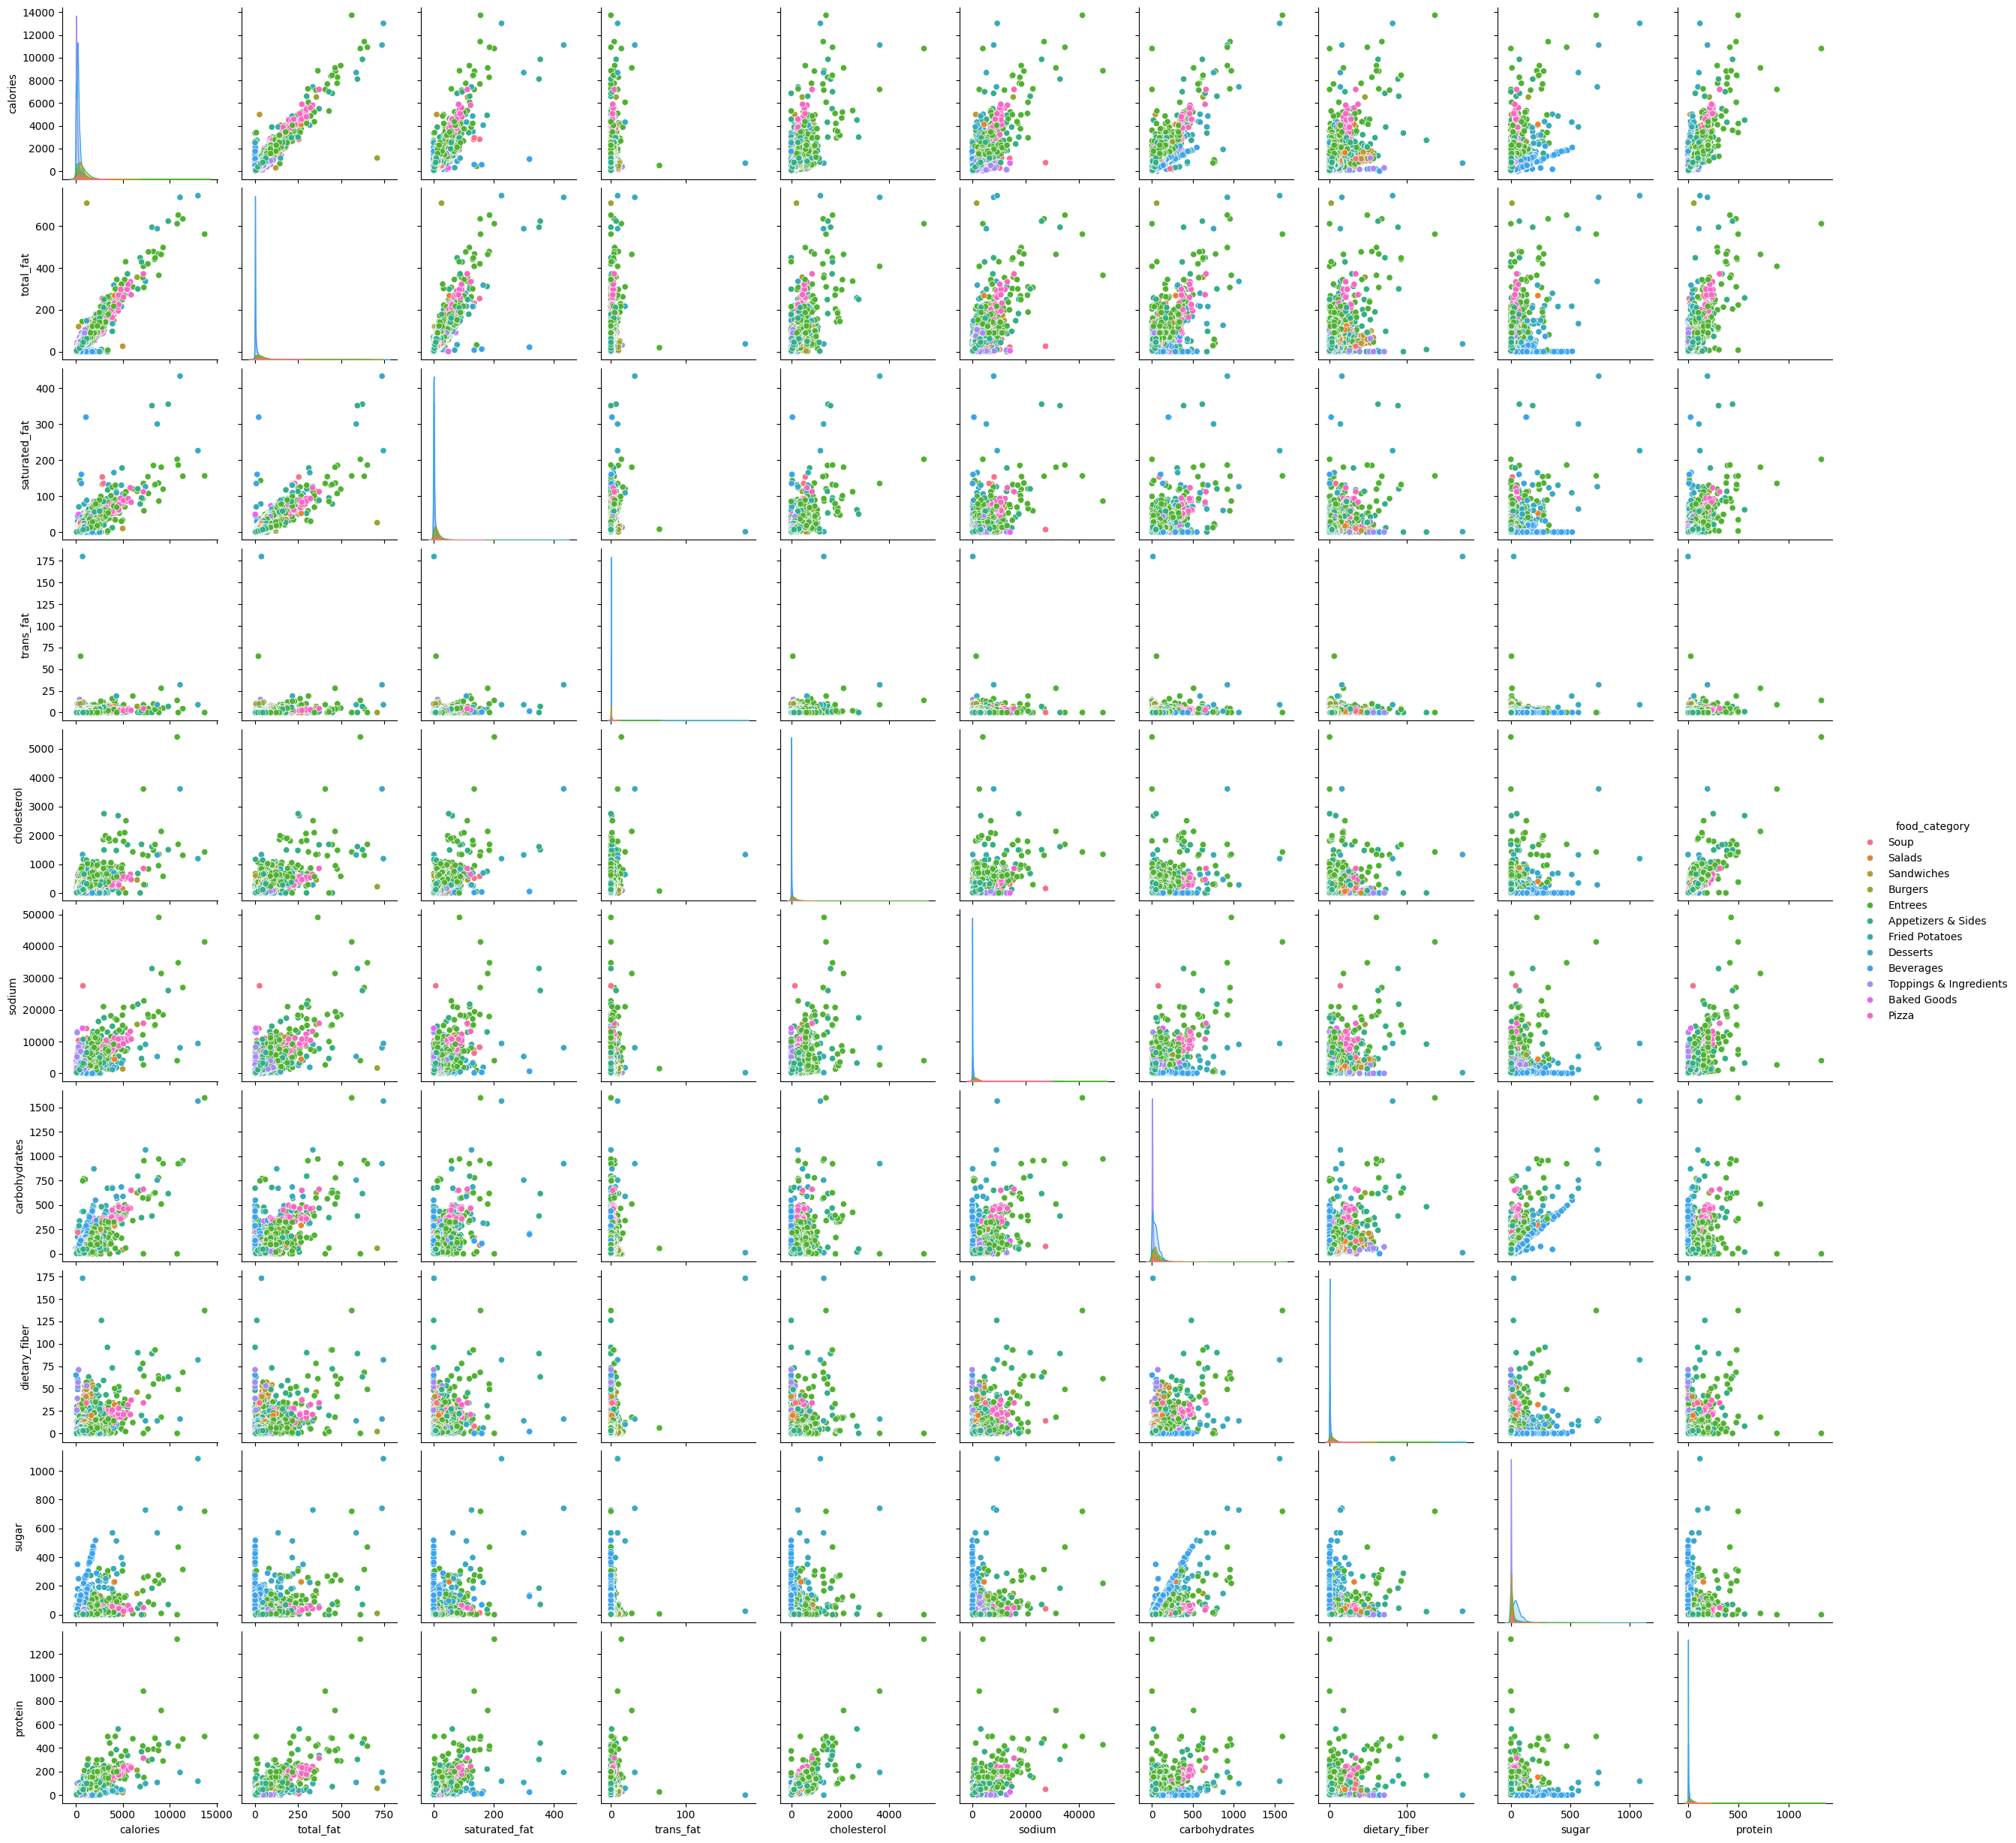

In [22]:
sns.pairplot(df, hue='food_category')

Based on our observations:
- There seems to be a strong positive correlation between calories and total fat, calories and saturated fat, and total fat and saturated fat
- There seems to be a positive correlation between calories and carbohydrates, and calories and protein
- Trans fat does not seem to change that much as we change the values of other nutrients

Lets construct a correlation matrix

<Axes: >

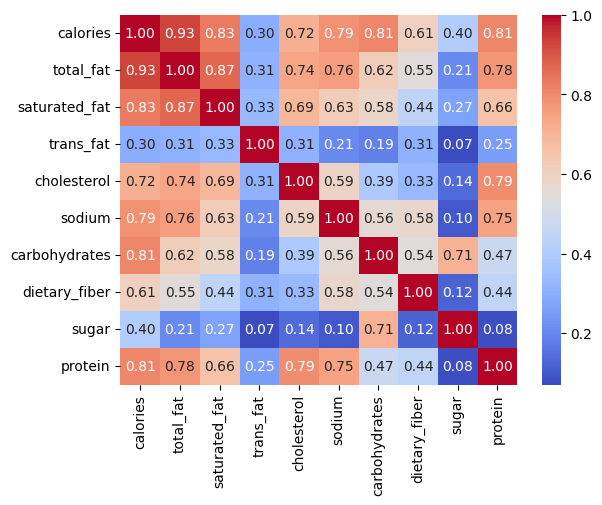

In [23]:
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

We can confirm there seems to be a positive correlation with a lot of values. For those trying to stay healthy, we can see that the tradeoff of higher nutrients like protein is more fat.

Lets do a box plot to see if we have any outliers

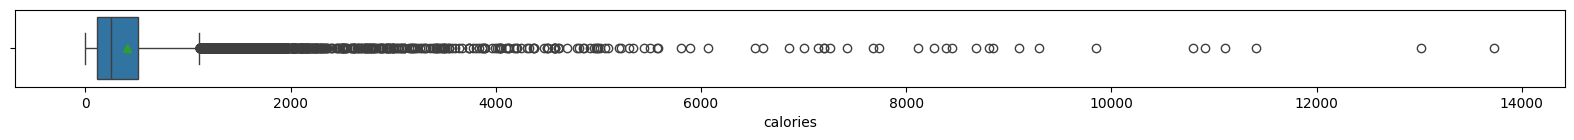

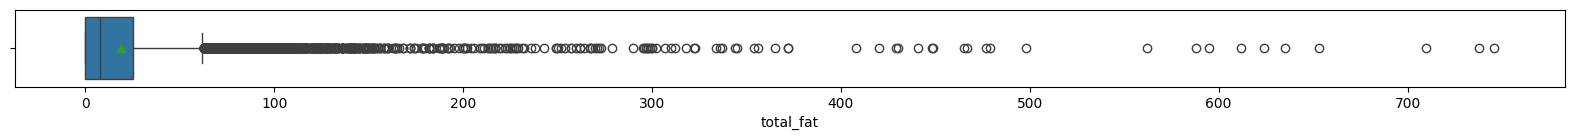

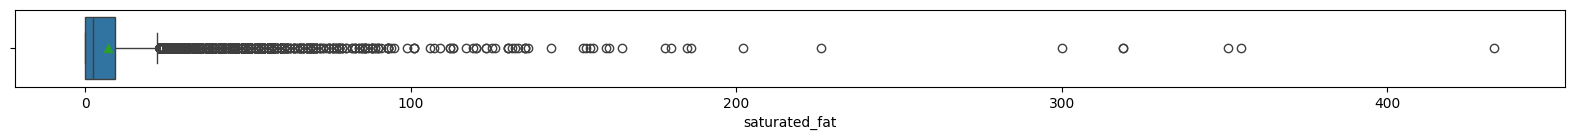

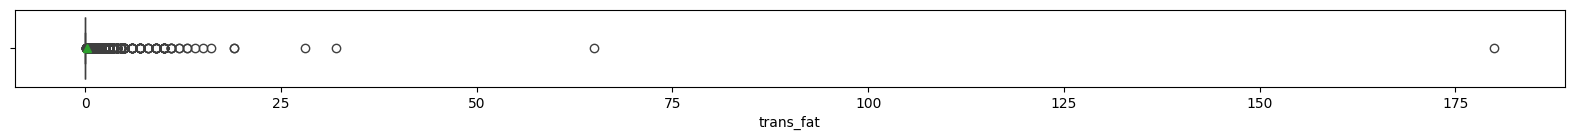

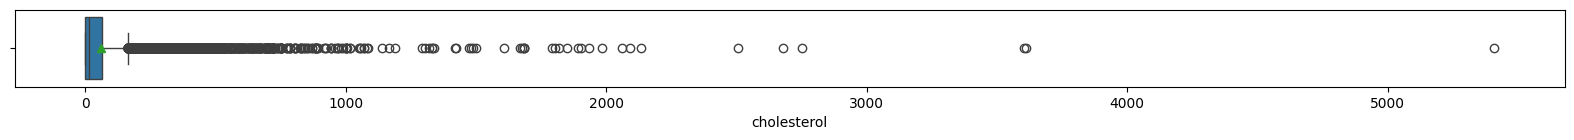

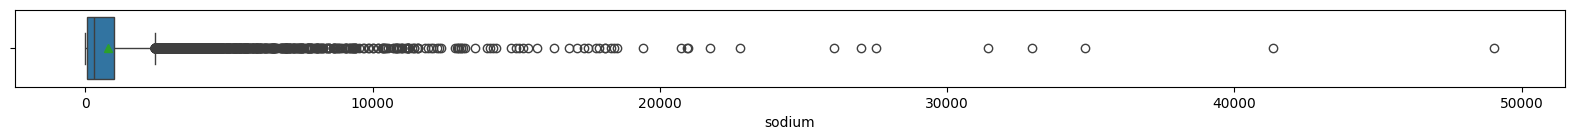

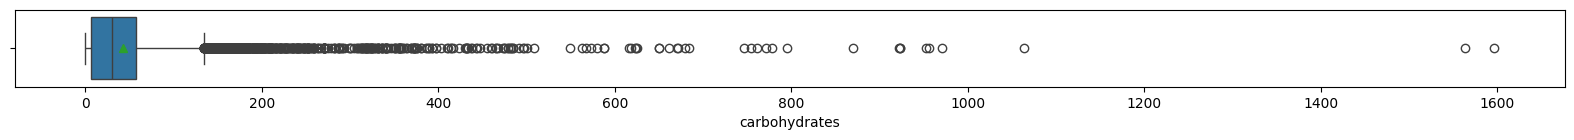

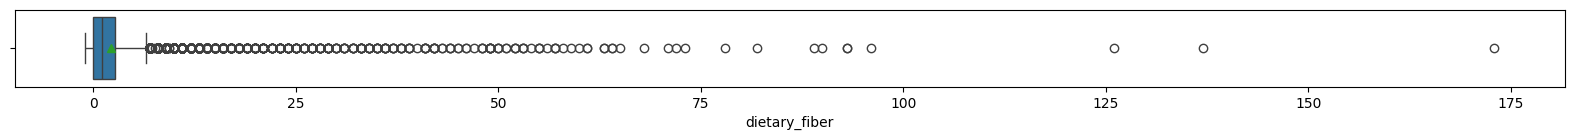

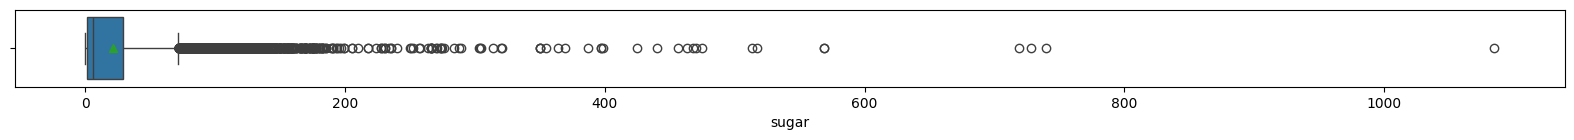

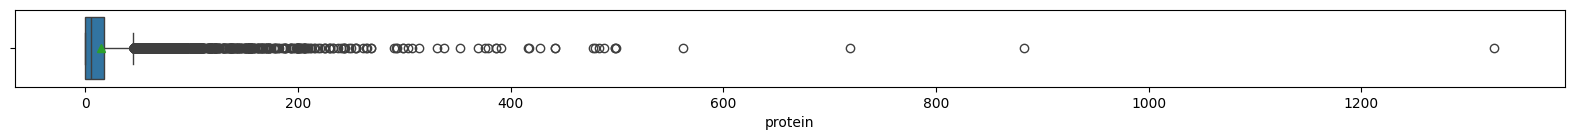

In [24]:
for numeric in numeric_columns:
    plt.figure(figsize=(20, 1))
    sns.boxplot(x=df[numeric], showmeans=True)

Some food categories have a very high calorie count, way more than the daily recommended value. This is mainly because these foods are intended as family meals and not for single person. In our app, we should determine how many people a person wants to share the meal with so that family meals are still an option.

# Model
We will use KNN (K-nearest neighbors)